In [ ]:
%cd /content/
!pip install ultralytics==8.0.20

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.3 MB/s eta 0:00:00


In [ ]:
!curl -L "https://app.roboflow.com/ds/9AEeIxH58n?key=tNrveVtXho" > roboflow.zip;
!unzip roboflow.zip; rm roboflow.zip

In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data=/content/data.yaml epochs=300 imgsz=522 plots=True

100% 131M/131M [00:00<00:00, 344MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/data.yaml, epochs=300, patience=50, batch=16, imgsz=522, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, d

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Yolov8_object_detection/runs/detect/train/weights/best.pt data=/content/data.yaml

2023-12-04 10:54:24.575550: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 10:54:24.575628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 10:54:24.575673: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 10:54:26.138965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs
100% 755k/755k [00:00<00:00, 15.6MB/s]
val: Scanning /content/valid/labels... 50 images, 0 ba

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolov8_object_detection/runs/detect/train/weights/best.pt conf=0.25 source=/content/test/images save=True

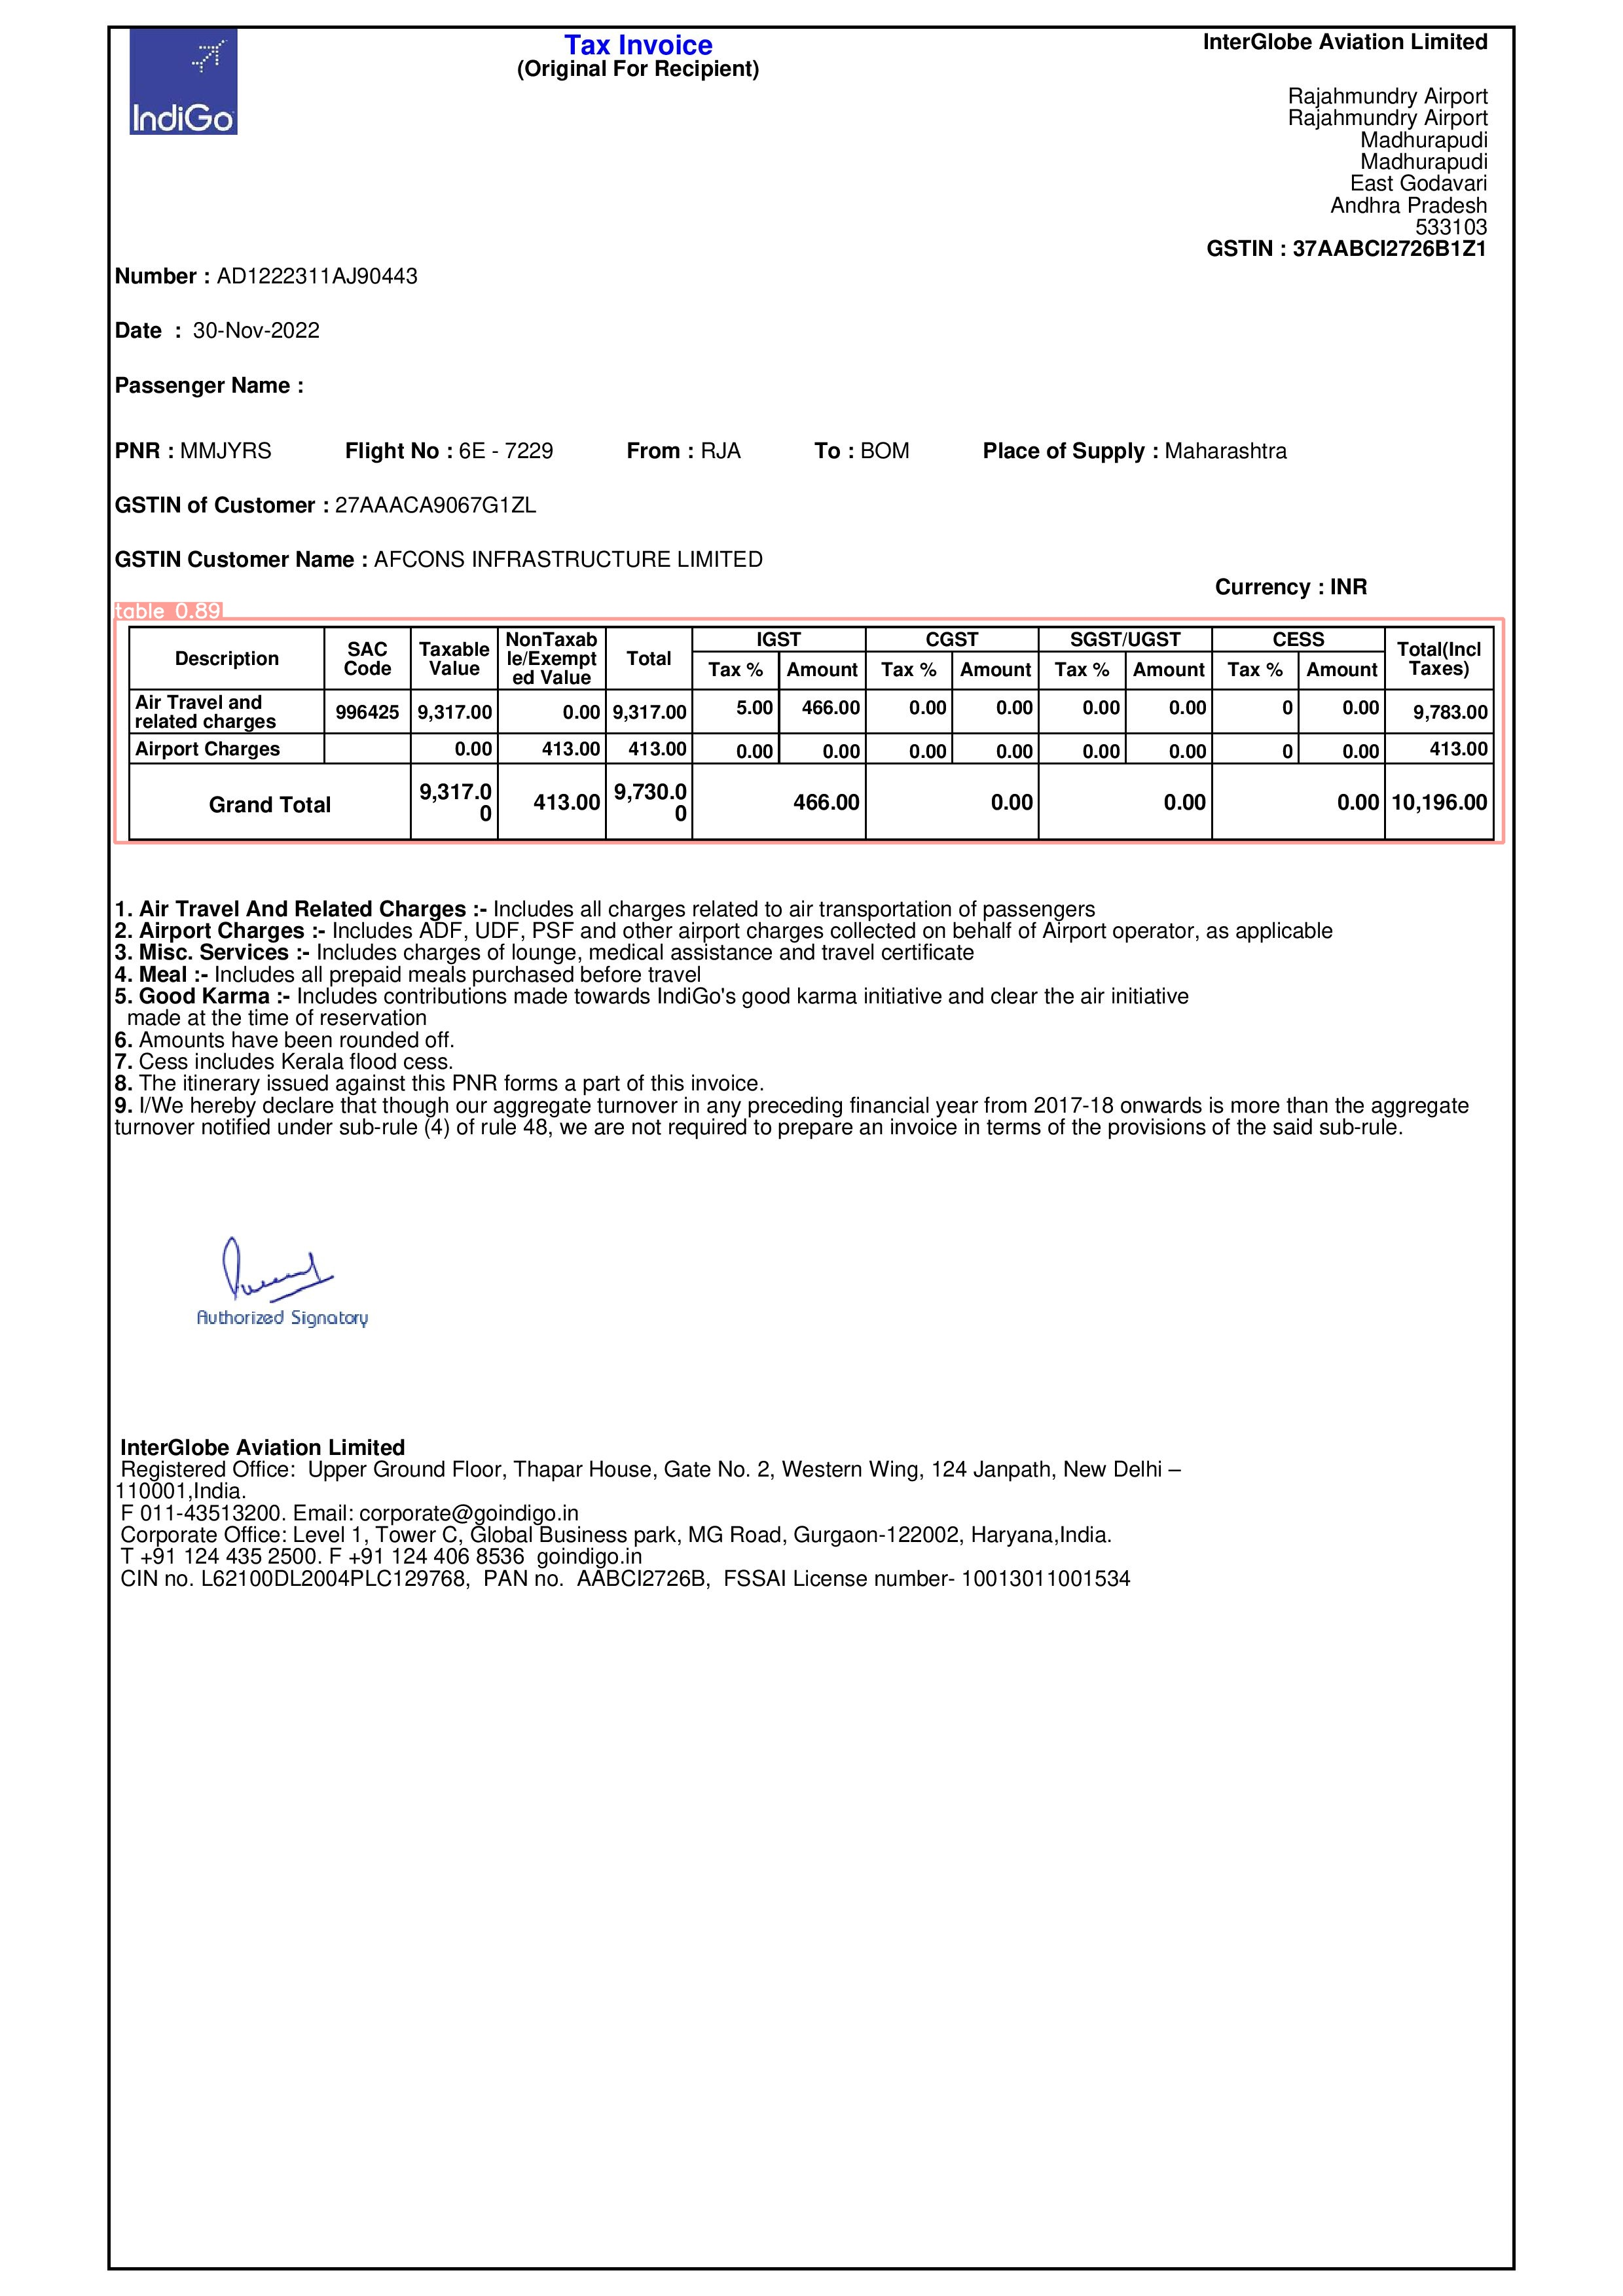

In [ ]:
import glob
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/predict/1_10.jpg'  , width = 500))

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Read the predicted image
image = cv2.imread('/content/runs/detect/predict/1_1.jpg')

# Convert the image to grayscale (if necessary)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a suitable thresholding method to create a binary image
_, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the image with bounding boxes
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from ultralytics import YOLO

inovoice_detector = YOLO('/content/drive/MyDrive/Yolov8_object_detection/runs/detect/train/weights/best.pt')
inovoice = inovoice_detector('/content/runs/detect/predict/1_8.jpg', save=True, save_crop=True)

In [ ]:
for r in inovoice:
    print(r.boxes)

tensor([[2.10000e+02, 1.44500e+03, 4.08300e+03, 2.25300e+03, 9.23510e-01, 1.00000e+00]], device='cuda:0')


In [ ]:
import torch
tensor = torch.tensor([[2.10000e+02, 1.44500e+03, 4.08300e+03, 2.25300e+03, 9.23510e-01, 1.00000e+00]])
x_min, y_min, width, height, _, _ = tensor.squeeze().tolist()
x_max = x_min + width
y_max = y_min + height
bounding_box = [x_min, y_min, x_max, y_max]

print(bounding_box)


[210.0, 1445.0, 4293.0, 3698.0]


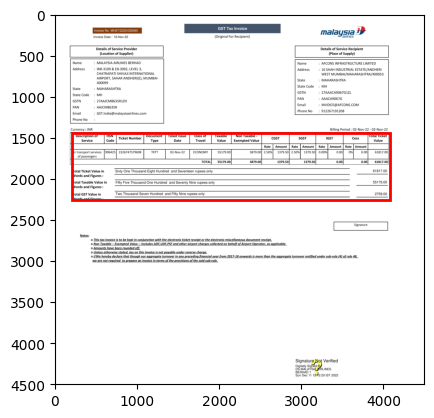

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x_min, y_min, x_max, y_max = 210, 1445, 4083, 2253


image = plt.imread('/content/1_8.jpg')

fig, ax = plt.subplots(1)

ax.imshow(image)


bbox = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')

ax.add_patch(bbox)

ax.set_xlim(0, image.shape[1])
ax.set_ylim(image.shape[0], 0)

plt.show()


In [ ]:
!pip install pytesseract

In [ ]:
!pip install easyocr

In [ ]:
import easyocr

reader = easyocr.Reader(['en'])
Image_Path = r"/content/runs/detect/predict4/crops/table/1_8.jpg"
img=cv2.imread(Image_Path)
output = reader.readtext(Image_Path)
output

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[54, 0], [121, 0], [121, 19], [54, 19]], 'le', 0.6815304606789956),
 ([[135, 0], [186, 0], [186, 16], [135, 16]], 'U.9', 0.15239539751106704),
 ([[81, 25], [363, 25], [363, 85], [81, 85]],
  'Description of',
  0.9844394829190823),
 ([[456, 30], [548, 30], [548, 78], [456, 78]], 'HSN', 0.99966007852053),
 ([[940, 31], [1144, 31], [1144, 74], [940, 74]],
  'Document',
  0.9999676310033457),
 ([[1202, 30], [1433, 30], [1433, 78], [1202, 78]],
  'Ticket Issue',
  0.9992831595338184),
 ([[1524, 26], [1683, 26], [1683, 78], [1524, 78]],
  'Class of',
  0.9982636914691246),
 ([[1771, 30], [1934, 30], [1934, 78], [1771, 78]],
  'Taxable',
  0.8968067965088965),
 ([[2031, 30], [2277, 30], [2277, 78], [2031, 78]],
  'Non Taxable',
  0.9696038610715707),
 ([[3646, 26], [3880, 26], [3880, 78], [3646, 78]],
  'Total Ticket',
  0.7899511204904217),
 ([[602, 57], [898, 57], [898, 106], [602, 106]],
  'Ticket Number',
  0.9234609784478023),
 ([[2461, 57], [2571, 57], [2571, 106], [2461, 106]],
  '

In [ ]:
import pandas as pd
df = pd.DataFrame(output, columns=['x', 'Attributes', 'y'])
df.drop(['x'],axis=1,inplace= True)
df.drop(['y'],axis=1,inplace= True)
# print(df.columns)
df[20:]

,Attributes
20,Value
21,Exempted Value
22,Value
23,Rate
24,Amount
25,Rate
26,Amount
27,Rate
28,Amount
29,Rate
